# <font color='lightseagreen'> *Case Study: How Does a Bike-Share Navigate Speedy Success*
---

  > ###  <font color='salmon'>   • Business task statement: Cyclistic is a bike-share company in Chicago. It has two broad classifications of customers, casual riders and annual members. Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. To do that, however, the marketing analyst team, which I am a part of, needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. As a junior data analyst, my role is to answer the question: How do annual members and casual riders use Cyclistic bikes differently? From the insights we get, we will design an innovative marketing strategy to convert casual riders into annual members.</font>
   
   ---


  > ### <font color='salmon'> • This notebook analyzes a 12-month data to come up with insights that will help provide solution to the business problem above.</font>

#### Import the libraries for data analysis and visualization

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Create a list of the CSV file paths for each month of data

In [40]:
# Create a list of the CSV file paths
csv_file_paths = [
    "202203-divvy-tripdata.csv",
    "202204-divvy-tripdata.csv",
    "202205-divvy-tripdata.csv",
    "202206-divvy-tripdata.csv",
    "202207-divvy-tripdata.csv",
    "202208-divvy-tripdata.csv",
    "202209-divvy-tripdata.csv",
    "202210-divvy-tripdata.csv",
    "202211-divvy-tripdata.csv",
    "202212-divvy-tripdata.csv",
    "202301-divvy-tripdata.csv",
    "202302-divvy-tripdata.csv",
]

#### Read the CSV files into Pandas DataFrames and merge them into one DataFrame

In [41]:
# Read the CSV files into Pandas DataFrames
df_list = [pd.read_csv(file_path) for file_path in csv_file_paths]

# Merge the DataFrames using the `pd.concat()` function
merged_df = pd.concat(df_list, ignore_index=True)

# Write the merged DataFrame to a new CSV file
merged_df.to_csv("merged.csv", index=False)

#### Explore the merged DataFrame and its columns

In [42]:
merged_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.886875,-87.626030,41.889177,-87.638506,member
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.900998,-87.623752,41.898203,-87.637536,member
2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.978353,-87.659753,41.984045,-87.660274,member
3,9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.886875,-87.626030,41.877708,-87.635321,member
4,431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.911722,-87.626804,41.877945,-87.662007,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829079,C04510F8EBB5EE8A,classic_bike,2023-02-08 21:57:22,2023-02-08 22:08:06,Clark St & Wrightwood Ave,TA1305000014,Sheffield Ave & Waveland Ave,TA1307000126,41.929546,-87.643118,41.949399,-87.654529,member
5829080,187BA364FB265C80,electric_bike,2023-02-19 11:29:09,2023-02-19 11:39:11,Ogden Ave & Roosevelt Rd,KA1504000101,Delano Ct & Roosevelt Rd,KA1706005007,41.866500,-87.684476,41.867491,-87.632190,member
5829081,46B54F6B417D1B27,electric_bike,2023-02-07 09:01:33,2023-02-07 09:16:53,Clark St & Wrightwood Ave,TA1305000014,Canal St & Madison St,13341,41.929528,-87.643254,41.882409,-87.639767,casual
5829082,335B3CAD59F6C016,electric_bike,2023-02-22 08:33:22,2023-02-22 08:50:11,Clark St & Wrightwood Ave,TA1305000014,Canal St & Madison St,13341,41.929611,-87.643118,41.882409,-87.639767,casual


#### Remove all duplicate rows from the merged DataFrame and save it to a new CSV file

In [43]:
# Read the merged CSV file
data = pd.read_csv("merged.csv")

# Remove all duplicate rows
merged_deduplicated = data.drop_duplicates()

# Write the merged DataFrame to a new CSV file
merged_deduplicated.to_csv("merged_deduplicated.csv", index=False)

#### Remove the unneeded columns that contain location data as we will not need it for this analysis

In [44]:
# Read the merged CSV file
data = pd.read_csv("merged_deduplicated.csv")

# Remove the unneeded columns
data = data.drop(columns=["start_lat", "start_lng", "end_lat", "end_lng"])

data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,member
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,member
2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,member
3,9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,member
4,431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,member
...,...,...,...,...,...,...,...,...,...
5829079,C04510F8EBB5EE8A,classic_bike,2023-02-08 21:57:22,2023-02-08 22:08:06,Clark St & Wrightwood Ave,TA1305000014,Sheffield Ave & Waveland Ave,TA1307000126,member
5829080,187BA364FB265C80,electric_bike,2023-02-19 11:29:09,2023-02-19 11:39:11,Ogden Ave & Roosevelt Rd,KA1504000101,Delano Ct & Roosevelt Rd,KA1706005007,member
5829081,46B54F6B417D1B27,electric_bike,2023-02-07 09:01:33,2023-02-07 09:16:53,Clark St & Wrightwood Ave,TA1305000014,Canal St & Madison St,13341,casual
5829082,335B3CAD59F6C016,electric_bike,2023-02-22 08:33:22,2023-02-22 08:50:11,Clark St & Wrightwood Ave,TA1305000014,Canal St & Madison St,13341,casual


#### Add new columns for date, month, day, year, day of week, and ride length

In [45]:
# Add a column for the date
data["date"] = pd.to_datetime(data["started_at"])

# Add a column for the month
data["month"] = data["date"].dt.month
data["month"] = pd.to_datetime(data["month"], format='%m').dt.month_name()

# Add a column for the day
data["day"] = data["date"].dt.day

# Add a column for the year
data["year"] = data["date"].dt.year

# Add a column for the day of the week
data["day_of_week"] = data["date"].dt.day_name()

# Add a column for the ride length in seconds
data["ended_at"] = pd.to_datetime(data["ended_at"])
data["started_at"] = pd.to_datetime(data["started_at"])
data["ride_length_sec"] = (data["ended_at"] - data["started_at"]).dt.total_seconds()


# Filter out rows where the start_station_name is "HQ QR" or the ride_length is less than 0
# The dataframe includes a few hundred entries when bikes were taken out of docks and checked
# for quality by Divvy or ride_length was negative
data = data[~((data["start_station_name"] == "HQ QR") | (data["ride_length_sec"] < 0))]

# Write the updated DataFrame to a new CSV file
data.to_csv("dataCleaned.csv", index=False)
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,date,month,day,year,day_of_week,ride_length_sec
0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,member,2022-03-21 13:45:01,March,21,2022,Monday,377.0
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,member,2022-03-16 09:37:16,March,16,2022,Wednesday,378.0
2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,member,2022-03-23 19:52:02,March,23,2022,Wednesday,166.0
3,9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,member,2022-03-01 19:12:26,March,1,2022,Tuesday,588.0
4,431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,member,2022-03-21 18:37:01,March,21,2022,Monday,2530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829079,C04510F8EBB5EE8A,classic_bike,2023-02-08 21:57:22,2023-02-08 22:08:06,Clark St & Wrightwood Ave,TA1305000014,Sheffield Ave & Waveland Ave,TA1307000126,member,2023-02-08 21:57:22,February,8,2023,Wednesday,644.0
5829080,187BA364FB265C80,electric_bike,2023-02-19 11:29:09,2023-02-19 11:39:11,Ogden Ave & Roosevelt Rd,KA1504000101,Delano Ct & Roosevelt Rd,KA1706005007,member,2023-02-19 11:29:09,February,19,2023,Sunday,602.0
5829081,46B54F6B417D1B27,electric_bike,2023-02-07 09:01:33,2023-02-07 09:16:53,Clark St & Wrightwood Ave,TA1305000014,Canal St & Madison St,13341,casual,2023-02-07 09:01:33,February,7,2023,Tuesday,920.0
5829082,335B3CAD59F6C016,electric_bike,2023-02-22 08:33:22,2023-02-22 08:50:11,Clark St & Wrightwood Ave,TA1305000014,Canal St & Madison St,13341,casual,2023-02-22 08:33:22,February,22,2023,Wednesday,1009.0


#### Create a pivot table to summarize the ride length statistics by rider type

In [46]:
# Read the cleaned CSV file
data = pd.read_csv("dataCleaned.csv")

# Create a pivot table to summarize the mean, median, max, and min ride length by member casual
ride_length_summary = data.pivot_table(
    index="member_casual",
    values="ride_length_sec",
    aggfunc=["mean", "median", "max", "min"],
)

# Print the pivot table
print(ride_length_summary)

                         mean          median             max             min
              ride_length_sec ride_length_sec ride_length_sec ride_length_sec
member_casual                                                                
casual            1736.667947           770.0       2483235.0             0.0
member             754.827156           524.0         93594.0             0.0


#### Create a pie chart to visualize the proportion of casual vs. member riders

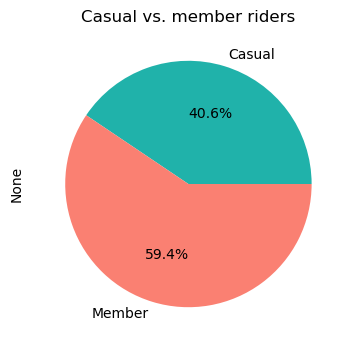

In [47]:
# Group the data by member_casual and count the number of rides for each group
ride_counts = data.groupby("member_casual").size()
# Create a pie chart using matplotlib.pyplot
plt.figure(figsize=(4, 4))
ride_counts.plot(kind="pie", autopct="%1.1f%%", labels=["Casual", "Member"], colors=["lightseagreen", "salmon"])
plt.title("Casual vs. member riders")
plt.savefig("pie_chart.png")

#### Create a bar chart to visualize the number of rides by rider type and day of the week

<Figure size 1000x600 with 0 Axes>

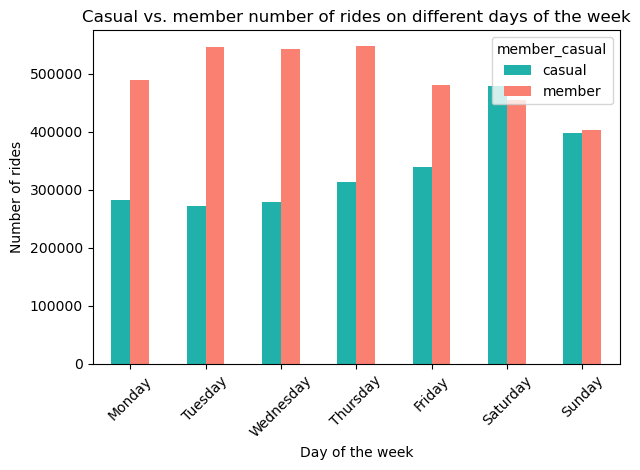

In [48]:
# Define the order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day_of_week' to a categorical type
data['day_of_week'] = pd.Categorical(data['day_of_week'], categories=days_order, ordered=True)

# Create a pivot table to summarize the number of rides by rider type and day of the week
ride_counts = data.pivot_table(
    index="day_of_week",
    columns="member_casual",
    values="ride_length_sec",
    aggfunc=np.size,
)

# Create a bar chart to visualize the number of rides by rider type and day of the week
plt.figure(figsize=(10, 6))
ride_counts.plot(kind="bar", stacked=False, color=['lightseagreen', 'salmon'])
plt.xlabel("Day of the week")
plt.ylabel("Number of rides")
plt.title("Casual vs. member number of rides on different days of the week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("ride_counts.png")

#### Create a bar chart to visualize the number of rides by rider type and rideable type

<Figure size 1000x600 with 0 Axes>

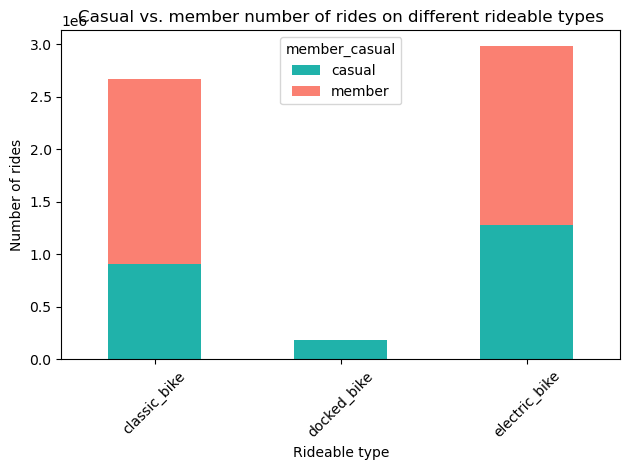

In [49]:
# Create a pivot table to summarize the number of rides by rider type and rideable type
ride_counts_rideable_type = data.pivot_table(
    index="rideable_type",
    columns="member_casual",
    values="ride_length_sec",
    aggfunc=np.size,
)

# Create a bar chart to visualize the number of rides by rider type and rideable type
plt.figure(figsize=(10, 6))
ride_counts_rideable_type.plot(kind="bar", stacked=True, color=['lightseagreen', 'salmon'])
plt.xlabel("Rideable type")
plt.ylabel("Number of rides")
plt.title("Casual vs. member number of rides on different rideable types")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("ride_counts_rideable_type.png")

#### Create a bar chart to visualize the number of rides by rider type and month

<Figure size 1000x600 with 0 Axes>

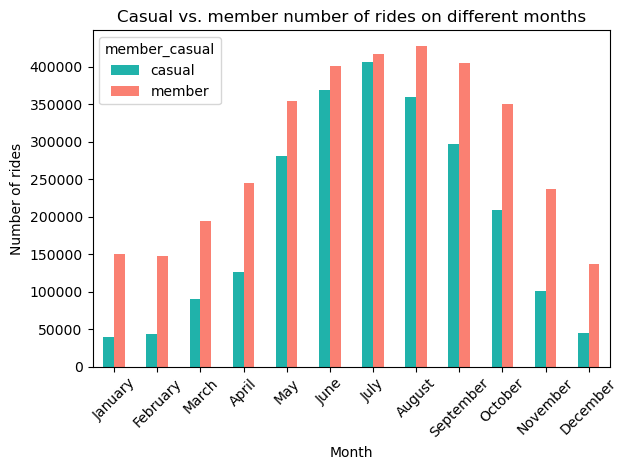

In [50]:
# Define the order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month' to a categorical type
data['month'] = pd.Categorical(data['month'], categories=months_order, ordered=True)

# Create a pivot table to summarize the number of rides by rider type and month
ride_counts_month = data.pivot_table(
    index="month",
    columns="member_casual",
    values="ride_length_sec",
    aggfunc=np.size,
)

# Create a bar chart to visualize the number of rides by rider type and month
plt.figure(figsize=(10, 6))
ride_counts_month.plot(kind="bar", stacked=False, color=['lightseagreen', 'salmon'])
plt.xlabel("Month")
plt.ylabel("Number of rides")
plt.title("Casual vs. member number of rides on different months")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("ride_counts_month.png")

#### Create a bar chart to visualize the average ride duration by rider type and day of the week

<Figure size 1000x600 with 0 Axes>

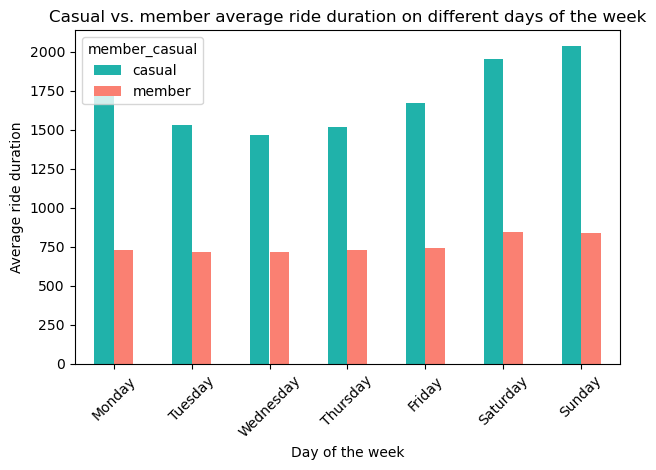

In [51]:
# Define the order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day_of_week' to a categorical type
data['day_of_week'] = pd.Categorical(data['day_of_week'], categories=days_order, ordered=True)

# Create a pivot table to summarize the average ride duration by rider type and day of the week
ride_counts = data.pivot_table(
    index="day_of_week",
    columns="member_casual",
    values="ride_length_sec",
    aggfunc=np.mean,
)

# Create a bar chart to visualize the average ride duration by rider type and day of the week
plt.figure(figsize=(10, 6))
ride_counts.plot(kind="bar", stacked=False, color=['lightseagreen', 'salmon'])
plt.xlabel("Day of the week")
plt.ylabel("Average ride duration")
plt.title("Casual vs. member average ride duration on different days of the week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("ride_counts.png")